# Création d'une **rose des vents**

In [1]:
# Initialisation

## Importation des libraries, packages et modules nécessaires au fonctionnement de ce notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Définition des paramètres esthétiques généraux
%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

## Importation du jeu de données et enregistrement dans le DataFrame `df`
df = pd.read_csv("../../data/raw/weatherAUS.csv")

In [2]:
# Préparation des données générales

df_wind_gust = df[["Location", "WindGustDir", "WindGustSpeed"]]
df_wind_gust = df_wind_gust.dropna()
WindGustDir_directions_to_radians_dictionary = {
    "N": np.pi / 2,
    "E": 0.0,
    "S": 3 * np.pi,
    "W": np.pi,
    "NE": np.pi / 4,
    "SE": 7 * np.pi / 4,
    "SW": 5 * np.pi / 4,
    "NW": 3 * np.pi / 4,
    "NNE": 0.375 * np.pi,
    "ENE": 0.125 * np.pi,
    "ESE": 1.875 * np.pi,
    "SSE": 1.625 * np.pi,
    "SSW": 1.375 * np.pi,
    "WSW": 1.125 * np.pi,
    "WNW": 0.875 * np.pi,
    "NNW": 0.625 * np.pi
    }
wind_gust_speed_categories = ["0 - 20", "20 - 40", "40 - 60", "60 - 80", "80 - 100", "> 100"]

In [53]:
# Définition d'une fonction qui prend en argument le nom d'une station météorologique sous forme de chaîne de caractères et qui trace la rose des vents correspondante

def plot_wind_rose(location: str):

    ## Préparation des données spécifiques
    df_wind_gust_location = df_wind_gust[df_wind_gust["Location"] == location]
    df_wind_gust_location = df_wind_gust_location.replace(to_replace = WindGustDir_directions_to_radians_dictionary)
    wind_gust_speed_cut = pd.cut(x = df_wind_gust_location["WindGustSpeed"],
                                 bins = (0, 20, 40, 60, 80, 100, np.inf),
                                 labels = wind_gust_speed_categories)
    wind_gust_table = pd.crosstab((df_wind_gust_location["WindGustDir"]), wind_gust_speed_cut)
    N = 16
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint = False)
    width = np.pi / 8
    bottom = 0.0
    colors = ["#caf0f8", "#90e0ef", "#00b4d8", "#0077b6", "#03045e", "#000000"]

    ## Initialisation de la toile
    fig = plt.figure(figsize = (6 ,6))

    ## Traçage
    ax = plt.subplot(projection = "polar")
    for i in range(wind_gust_table.shape[1]): ### Itération sur les 6 colonnes (catégories de vent) de « wind_gust_table »
        radii = wind_gust_table.iloc[:, i] ### Colonne de « wind_gust_table » avec 16 lignes, chacune correspondant à la fréquence d'une direction du vent
        ax.bar(x = theta,
               height = radii,
               width = width,
               bottom = bottom,
               label = wind_gust_speed_categories[i] + " km / h",
               color = colors[i],
               alpha = 0.75) ### Traçage de la colonne
        bottom += radii ### Empilement de la colonne suivante

    ## Mise en forme
    lines, labels = plt.thetagrids(np.arange(0.0, 360, 22.5),
                                   ("E", "ENE", "NE", "NNE",
                                    "N", "NNW", "NW", "WNW",
                                    "W", "WSW", "SW", "SSW",
                                    "S", "SSE", "SE", "ESE"))
    ax.set_yticklabels([])
    plt.title("Les plus fortes rafales de vent à {}".format(location), fontweight = "bold", fontsize = 16)
    plt.legend(bbox_to_anchor=(1.25, 0), fontsize = 10);

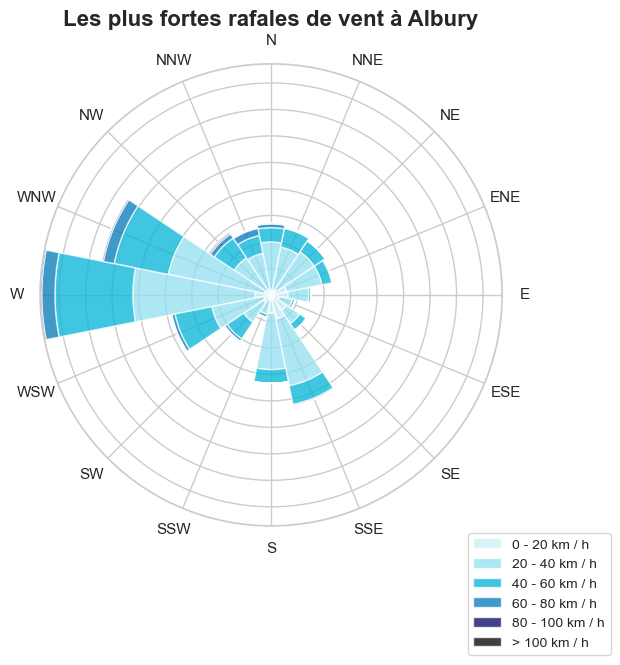

In [54]:
# Exécution de la fonction

plot_wind_rose("Albury")